## Imporation des modules

In [1]:
import sys
from os import chdir
from importlib import reload

import numpy  as np
import pandas as pd

## Réprésentation graphique
import matplotlib.pyplot as plt
import graphviz
from graphviz import render
from IPython.display import Image

from sklearn import model_selection, preprocessing, metrics
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn import neighbors

## Les arbres
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

## Les réseaux de neurones
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [2]:
## Importation d'un module personnalisé
sys.path.insert(0, r'D:\Users\User\Documents\Works\03 - Formations\02 - DataScientest\06 - Project\01 - Modules')

import BetPy_Annex
reload(BetPy_Annex)

from BetPy_Annex import Build_tree

## Chargement des données

In [3]:
## Chargement des données
chdir(r'D:\Users\User\Documents\Works\03 - Formations\02 - DataScientest\06 - Project\00 - Data\Football')

match_all = pd.read_csv('match_all.csv', index_col=0)

In [4]:
## Suppression des lignes ayant des NA dans la table « match_all »
match_all = match_all.dropna()

## Création des tables « data »

> <strong>Description :</strong>
>> ...

In [5]:
## Création de la table « data » principale

##########################
## ISSUES MATCH_RESULTS ##
##########################

data                        = pd.DataFrame(match_all[['Dom_Ext', 'CLB_Nb_jours', 'ADV_Nb_jours']])

data['Écart_Série_vic']     = match_all['CLB_Série_vic']   - match_all['ADV_Série_vic']
data['Écart_Série_vic_5']   = match_all['CLB_Série_vic_5'] - match_all['ADV_Série_vic_5']
data['Écart_Série_vic_3']   = match_all['CLB_Série_vic_3'] - match_all['ADV_Série_vic_3']
data['Écart_Série_vic_1']   = match_all['CLB_Série_vic_1'] - match_all['ADV_Série_vic_1']

data['Écart_buts_diff']     = match_all['CLB_Tot_buts_diff']   - match_all['ADV_Tot_buts_diff']
data['Écart_buts_diff_5']   = match_all['CLB_Tot_buts_diff_5'] - match_all['ADV_Tot_buts_diff_5']
data['Écart_buts_diff_3']   = match_all['CLB_Tot_buts_diff_3'] - match_all['ADV_Tot_buts_diff_3']
data['Écart_buts_diff_1']   = match_all['CLB_Tot_buts_diff_1'] - match_all['ADV_Tot_buts_diff_1']

data['Écart_buts_pour']     = match_all['CLB_Tot_buts_pour']   - match_all['ADV_Tot_buts_pour']
data['Écart_buts_pour_5']   = match_all['CLB_Tot_buts_pour_5'] - match_all['ADV_Tot_buts_pour_5']
data['Écart_buts_pour_3']   = match_all['CLB_Tot_buts_pour_3'] - match_all['ADV_Tot_buts_pour_3']
data['Écart_buts_pour_1']   = match_all['CLB_Tot_buts_pour_1'] - match_all['ADV_Tot_buts_pour_1']

data['Écart_buts_contre']   = match_all['ADV_Tot_buts_contre']   - match_all['CLB_Tot_buts_contre']
data['Écart_buts_contre_5'] = match_all['ADV_Tot_buts_contre_5'] - match_all['CLB_Tot_buts_contre_5']
data['Écart_buts_contre_3'] = match_all['ADV_Tot_buts_contre_3'] - match_all['CLB_Tot_buts_contre_3']
data['Écart_buts_contre_1'] = match_all['ADV_Tot_buts_contre_1'] - match_all['CLB_Tot_buts_contre_1']

########################
## ISSUES MATCH_INFOS ##
########################

# Activité des attaquants
data['Écart_Activité_att_5'] = match_all['CLB_Act_Tot_att_3H_5'] - match_all['ADV_Act_Tot_att_3H_5']
data['Écart_Activité_att_3'] = match_all['CLB_Act_Tot_att_3H_3'] - match_all['ADV_Act_Tot_att_3H_3']
data['Écart_Activité_att_1'] = match_all['CLB_Act_Tot_att_3H_1'] - match_all['ADV_Act_Tot_att_3H_1']

# Activité des défenseurs
data['Écart_Activité_def_5'] = match_all['CLB_Act_Tot_def_3H_5'] - match_all['ADV_Act_Tot_def_3H_5']
data['Écart_Activité_def_3'] = match_all['CLB_Act_Tot_def_3H_3'] - match_all['ADV_Act_Tot_def_3H_3']
data['Écart_Activité_def_1'] = match_all['CLB_Act_Tot_def_3H_1'] - match_all['ADV_Act_Tot_def_3H_1']

# Nombre d'arrêts du gardien
data['Écart_Arrêts_5']       = match_all['CLB_Gar_Tot_3H_5'] - match_all['ADV_Gar_Tot_3H_5']
data['Écart_Arrêts_3']       = match_all['CLB_Gar_Tot_3H_3'] - match_all['ADV_Gar_Tot_3H_3']
data['Écart_Arrêts_1']       = match_all['CLB_Gar_Tot_3H_1'] - match_all['ADV_Gar_Tot_3H_1']

# Nombre de fautes des joueurs adverses dans la zone proche de leurs buts
data['Écart_Fautes_5']       = match_all['CLB_Fte_Tot_3H_5'] - match_all['ADV_Fte_Tot_3H_5']
data['Écart_Fautes_3']       = match_all['CLB_Fte_Tot_3H_3'] - match_all['ADV_Fte_Tot_3H_3']
data['Écart_Fautes_1']       = match_all['CLB_Fte_Tot_3H_1'] - match_all['ADV_Fte_Tot_3H_1']

# Nombre de passes intelligentes de la part de l'équipe
data['Écart_Passes_5']       = match_all['CLB_Pass_Tot_3H_5'] - match_all['ADV_Pass_Tot_3H_5']
data['Écart_Passes_3']       = match_all['CLB_Pass_Tot_3H_3'] - match_all['ADV_Pass_Tot_3H_3']
data['Écart_Passes_1']       = match_all['CLB_Pass_Tot_3H_1'] - match_all['ADV_Pass_Tot_3H_1']

# Nombre de tirs dans la zone proche du but adverse
data['Écart_Tirs_5']         = match_all['CLB_Tirs_Tot_3H_5'] - match_all['ADV_Tirs_Tot_3H_5']
data['Écart_Tirs_3']         = match_all['CLB_Tirs_Tot_3H_3'] - match_all['ADV_Tirs_Tot_3H_3']
data['Écart_Tirs_1']         = match_all['CLB_Tirs_Tot_3H_1'] - match_all['ADV_Tirs_Tot_3H_1']

######################
## VARIABLES CIBLES ##
######################

data['[Résultat]']           = match_all['[Résultat]']
data['[CLB_Buts]']           = match_all['[CLB_Buts]']
data['[ADV_Buts]']           = match_all['[ADV_Buts]']

In [6]:
## Affichage pour vérification
data.iloc[:2, :].T

426    427
Dom_Ext                 1.0    0.0
CLB_Nb_jours            7.0    6.0
ADV_Nb_jours            6.0    7.0
Écart_Série_vic         1.0   -1.0
Écart_Série_vic_5       1.0   -1.0
Écart_Série_vic_3       0.0    0.0
Écart_Série_vic_1       0.0    0.0
Écart_buts_diff         6.0   -6.0
Écart_buts_diff_5       5.0   -5.0
Écart_buts_diff_3      -1.0    1.0
Écart_buts_diff_1       1.0   -1.0
Écart_buts_pour         1.0   -1.0
Écart_buts_pour_5       1.0   -1.0
Écart_buts_pour_3      -1.0    1.0
Écart_buts_pour_1       0.0    0.0
Écart_buts_contre       5.0   -5.0
Écart_buts_contre_5     4.0   -4.0
Écart_buts_contre_3     0.0    0.0
Écart_buts_contre_1     1.0   -1.0
Écart_Activité_att_5  477.0 -477.0
Écart_Activité_att_3  244.0 -244.0
Écart_Activité_att_1  100.0 -100.0
Écart_Activité_def_5 -358.0  358.0
Écart_Activité_def_3   -3.0    3.0
Écart_Activité_def_1  -60.0   60.0
Écart_Arrêts_5         -1.0    1.0
Écart_Arrêts_3         -2.0    2.0
Écart_Arrêts_1         -1.0    1.0
Écart_Fautes_5         -2.0    2.0
Écart_Fautes_3          2.0   -2.0
Écart_Fautes_1         -3.0    3.0
Écart_Passes_5          5.0   -5.0
Écart_Passes_3          6.0   -6.0
Écart_Passes_1         -1.0    1.0
Écart_Tirs_5           11.0  -11.0
Écart_Tirs_3            9.0   -9.0
Écart_Tirs_1           -5.0    5.0
[Résultat]              1.0    0.0
[CLB_Buts]              1.0    0.0
[ADV_Buts]              0.0    1.0

## Préparation du Jeux De Données

In [7]:
## Sélection du JDD à utiliser
dt     = data.drop(['[Résultat]', '[CLB_Buts]', '[ADV_Buts]'], axis=1)
target = data['[Résultat]']

In [8]:
## Séparation des données pour entraînement des modèles
#  -> les données sont triées dans l'ordre où les matchs se sont déroulés
X_train, X_test, y_train, y_test = train_test_split(dt, target, test_size=.2, shuffle=False)

In [9]:
## Standardisation
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Entraînement des modèles, prédiction et évaluation
## 1. GridSearch SVM

In [10]:
## Préparation de la grille de recherche pour les hyperparamètres
param_grid = {"C"      : [.1, 1, 10],
              "kernel" : ['rbf', 'linear','poly'],
              "gamma"  : [.001, .01, .1, .5]}

## Instanciation du classifieur pour la recherche des meilleurs hyperparamètres
clf_grid = model_selection.GridSearchCV(estimator=svm.SVC(),
                                        param_grid=param_grid)

In [11]:
## Recherche des meilleurs hyperparamètres sur le JDD d'entraînement
grid = clf_grid.fit(X_train_scaled, y_train)

In [12]:
## Affichage des résultats
pd.DataFrame.from_dict(grid.cv_results_).loc[:,["params","mean_test_score"]]

params  mean_test_score
0      {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}         0.691765
1   {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}         0.703529
2     {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}         0.692941
3       {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}         0.703529
4    {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}         0.703529
5      {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}         0.692353
6        {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}         0.691765
7     {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}         0.703529
8       {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}         0.631765
9        {'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}         0.628235
10    {'C': 0.1, 'gamma': 0.5, 'kernel': 'linear'}         0.703529
11      {'C': 0.1, 'gamma': 0.5, 'kernel': 'poly'}         0.611765
12       {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}         0.709412
13    {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}         0.697647
14      {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}         0.692941
15        {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}         0.694118
16     {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}         0.697647
17       {'C': 1, 'gamma': 0.01, 'kernel': 'poly'}         0.697059
18         {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}         0.678824
19      {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}         0.697647
20        {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}         0.614118
21         {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}         0.626471
22      {'C': 1, 'gamma': 0.5, 'kernel': 'linear'}         0.697647
23        {'C': 1, 'gamma': 0.5, 'kernel': 'poly'}         0.611765
24      {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}         0.690588
25   {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}         0.690588
26     {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}         0.692941
27       {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}         0.676471
28    {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}         0.690588
29      {'C': 10, 'gamma': 0.01, 'kernel': 'poly'}         0.681176
30        {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}         0.682353
31     {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}         0.690588
32       {'C': 10, 'gamma': 0.1, 'kernel': 'poly'}         0.611765
33        {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}         0.624706
34     {'C': 10, 'gamma': 0.5, 'kernel': 'linear'}         0.690588
35       {'C': 10, 'gamma': 0.5, 'kernel': 'poly'}         0.611765

In [13]:
## Prédiction avec les meilleurs hyperparamètres sur le JDD de test

# Intanciation du classifieur + affectation des meilleurs hyperparamètres
clf_svm = svm.SVC()
clf_svm.set_params(**clf_grid.best_params_)

# Entraînement
clf_svm.fit(X_train_scaled, y_train)

# Prédiction
y_pred = clf_svm.predict(X_test_scaled)

In [14]:
## Évaluation du modèle
print("Score de la prédiction : {} %".format(int(clf_svm.score(X_test_scaled, y_test) * 100.) / 100.))
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Score de la prédiction : 0.63 %


Classe prédite  0.0  1.0
Classe réelle           
0.0             136   77
1.0              77  136

In [15]:
## Affichage du rapport d'évaluation
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64       213
         1.0       0.64      0.64      0.64       213

    accuracy                           0.64       426
   macro avg       0.64      0.64      0.64       426
weighted avg       0.64      0.64      0.64       426



## 2. KNN

In [16]:
## Instanciation du classifieur + affectation des hyperparamètres
clf_knn = neighbors.KNeighborsClassifier(n_neighbors=7, metric="minkowski")

In [17]:
## Entraînement du modèle
clf_knn.fit(X_train_scaled, y_train)

## Prédiction
y_pred = clf_knn.predict(X_test_scaled)

In [18]:
## Évaluation du modèle
print("Score de la prédiction : {} %".format(int(clf_knn.score(X_test_scaled, y_test) * 100.) / 100.))
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Score de la prédiction : 0.65 %


Classe prédite  0.0  1.0
Classe réelle           
0.0             139   74
1.0              74  139

In [19]:
## Affichage du rapport d'évaluation
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.65      0.65       213
         1.0       0.65      0.65      0.65       213

    accuracy                           0.65       426
   macro avg       0.65      0.65      0.65       426
weighted avg       0.65      0.65      0.65       426



## 3. Random Forest

In [20]:
## Instanciation du classifieur
clf_rf = ensemble.RandomForestClassifier(n_jobs=-1)

## Entraînement
clf_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=-1)

In [21]:
## Prédiction
y_pred = clf_rf.predict(X_test_scaled)

In [22]:
## Évaluation du modèle
print("Score de la prédiction : {} %".format(int(clf_rf.score(X_test_scaled, y_test) * 100.) / 100.))
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Score de la prédiction : 0.66 %


Classe prédite  0.0  1.0
Classe réelle           
0.0             141   72
1.0              70  143

In [23]:
## Affichage du rapport d'évaluation
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.66      0.67       213
         1.0       0.67      0.67      0.67       213

    accuracy                           0.67       426
   macro avg       0.67      0.67      0.67       426
weighted avg       0.67      0.67      0.67       426



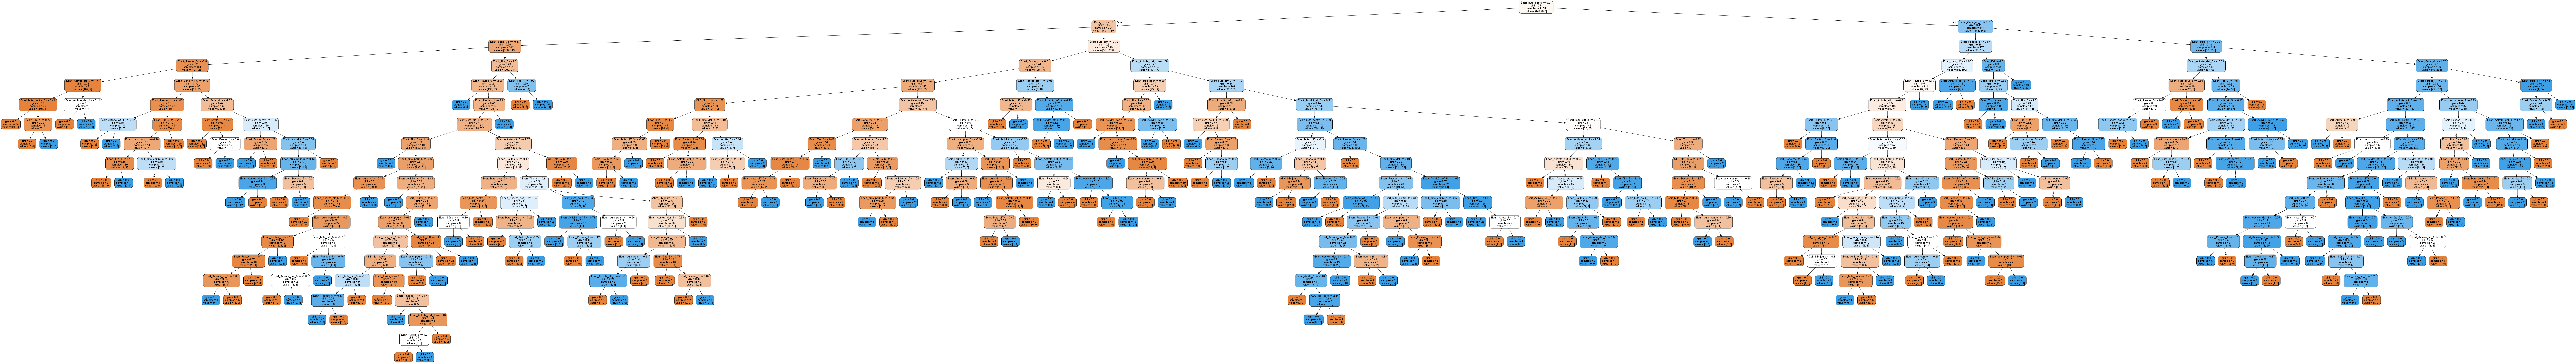

In [24]:
## Visualisation du 1er arbre de la forêt
export_graphviz(clf_rf.estimators_[0],
                feature_names=dt.columns,
                out_file='tree.dot',
                rounded=True,
                proportion=False,
                precision=2,
                filled=True
               )

render('dot', 'png', 'tree.dot')
Image(filename='tree.dot.png')

In [25]:
# Récupération des éléments du premier arbre de la forêt
df_tree = pd.DataFrame(Build_tree(export_graphviz(clf_rf.estimators_[0], feature_names=dt.columns).split(';')))

# Boucle sur le reste de la forêt
for i in range(1, len(clf_rf.estimators_)):
    # Récupération des éléments de l'arbre courant
    df_tree = pd.concat([df_tree, pd.DataFrame(Build_tree(export_graphviz(clf_rf.estimators_[i], feature_names=dt.columns).split(';')))])

# Suppression des informations provenant des feuilles (ayant des NA)
df_tree = df_tree.dropna()

# Pondération de chaque noeud
# -> plus le noeud est proche de la racine, plus son poids est fort
df_tree['Poids'] = df_tree.Niveau.max() - df_tree.Niveau

In [26]:
## Affichage de tous les noeuds composant la forêt
df_tree

Type  Numéro  Parent  Niveau              Variable  Valeur   gini  \
0    Node       0      -1       0     Écart_buts_diff_5   0.274  0.499   
1    Node       1       0       1               Dom_Ext   0.000  0.453   
2    Node       2       1       2       Écart_Série_vic  -0.468  0.355   
3    Node       3       2       3        Écart_Passes_5  -0.803  0.202   
4    Node       4       3       4  Écart_Activité_att_3   1.714  0.038   
..    ...     ...     ...     ...                   ...     ...    ...   
473  Node     473     471      12     Écart_buts_pour_5  -0.086  0.375   
479  Node     479     465       7   Écart_buts_contre_5   0.104  0.469   
482  Node     482     454       4  Écart_Activité_att_5  -2.839  0.044   
484  Node     484     482       5          Écart_Tirs_1   2.480  0.030   
485  Node     485     484       6        Écart_Fautes_5  -2.656  0.015   

     samples       value  Poids  
0       1105  [878, 822]     23  
1        691  [697, 369]     22  
2        342  [396, 119]     21  
3        151   [194, 25]     20  
4         71    [102, 2]     19  
..       ...         ...    ...  
473        4      [3, 1]     11  
479        5      [5, 3]     16  
482       77    [3, 129]     19  
484       76    [2, 129]     18  
485       75    [1, 129]     17  

[25565 rows x 10 columns]

In [27]:
## Récupération des variables présentes seulement dans les 1er niveaux des arbres
#  -> Aggrégation (somme des poids)
df_var = df_tree[df_tree.Niveau <= 2][['Variable', 'Poids']].groupby(by='Variable').sum().sort_values(by='Poids', ascending=False)

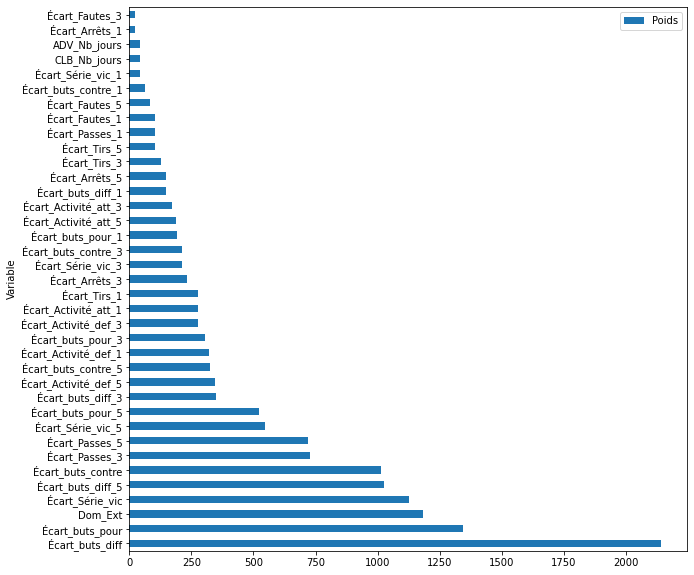

In [28]:
## Affichage des variables avec leur importance respective
df_var.plot.barh(figsize=(10, 10));

In [29]:
## Filtre sur les « meilleurs » variables
df_var[df_var['Poids'] >= 750]

Poids
Variable                
Écart_buts_diff     2140
Écart_buts_pour     1342
Dom_Ext             1181
Écart_Série_vic     1128
Écart_buts_diff_5   1026
Écart_buts_contre   1012

In [30]:
# Importance de chaque variables en pourcentage
df_var['Poids'] / df_var['Poids'].sum() * 100.

Variable
Écart_buts_diff         14.191923
Écart_buts_pour          8.899794
Dom_Ext                  7.832084
Écart_Série_vic          7.480602
Écart_buts_diff_5        6.804165
Écart_buts_contre        6.711320
Écart_Passes_3           4.834538
Écart_Passes_5           4.768221
Écart_Série_vic_5        3.634193
Écart_buts_pour_5        3.455136
Écart_buts_diff_3        2.307845
Écart_Activité_def_5     2.274687
Écart_buts_contre_5      2.142052
Écart_Activité_def_1     2.115525
Écart_buts_pour_3        2.022681
Écart_Activité_def_3     1.843624
Écart_Activité_att_1     1.830360
Écart_Tirs_1             1.823728
Écart_Arrêts_3           1.545195
Écart_Série_vic_3        1.419192
Écart_buts_contre_3      1.412561
Écart_buts_pour_1        1.273294
Écart_Activité_att_5     1.253399
Écart_Activité_att_3     1.127396
Écart_buts_diff_1        0.981497
Écart_Arrêts_5           0.974866
Écart_Tirs_3             0.835599
Écart_Tirs_5             0.696333
Écart_Passes_1           0.696333
Écart

In [31]:
# Export en CSV
df_var.to_csv('Évaluation_variables.csv', sep=',')

## 4. Réseau de neurones

In [32]:
## Modification des vecteurs de validation
y_train_nn = np_utils.to_categorical(y_train, dtype='int')
y_test_nn  = np_utils.to_categorical(y_test, dtype='int')

In [40]:
## Préparation du réseau de neuronnes

# Instanciation
clf_nn = Sequential()

# Ajout de la première couche (input)
clf_nn.add(Dense(units=20,
              input_dim=X_train_scaled.shape[1],
              kernel_initializer='normal',
              activation='tanh'))

# Ajout de la seconde couche (output)
clf_nn.add(Dense(units=y_train_nn.shape[1],
              kernel_initializer='normal',
              activation='softmax'))

# Compilation
clf_nn.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [41]:
## Affichage du réseau de neuronnes
clf_nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                760       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 42        
Total params: 802
Trainable params: 802
Non-trainable params: 0
_________________________________________________________________


In [42]:
## Entraînement du réseau de neuronnes
training_history = clf_nn.fit(X_train_scaled, y_train_nn,
                              epochs=10,
                              batch_size=170,
                              validation_split=.2)

Epoch 1/10
8/8 [==============================] - 0s 17ms/step - loss: 0.6814 - accuracy: 0.5882 - val_loss: 0.6461 - val_accuracy: 0.7235
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.6632 - val_loss: 0.6061 - val_accuracy: 0.7382
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6231 - accuracy: 0.6618 - val_loss: 0.5730 - val_accuracy: 0.7500
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.6691 - val_loss: 0.5482 - val_accuracy: 0.7529
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.6750 - val_loss: 0.5337 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 0.5874 - accuracy: 0.6816 - val_loss: 0.5252 - val_accuracy: 0.7471
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.6846 - val_loss: 0.5223 - val_accuracy: 0.7353
Epoch 8/10
8/8 [=================

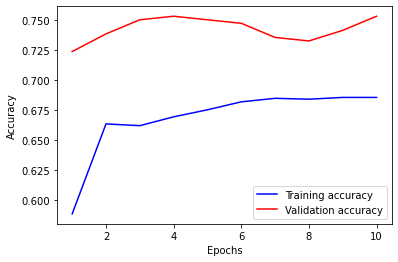

In [43]:
## Affichage des données d'entraînement

# Récupération des informations concernant l'entraînement
train_acc = training_history.history['accuracy']
val_acc   = training_history.history['val_accuracy']

## Préparation du graphe
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe sur l'évolution de la précision sur la partie JDD entraînement
plt.plot(np.arange(1, len(train_acc) + 1), train_acc, label='Training accuracy', color='blue')

# Courbe sur l'évoution de la précision sur la partie JDD validation
plt.plot(np.arange(1, len(val_acc) + 1), val_acc, label='Validation accuracy', color='red')

# Affichage
plt.legend()
plt.show()

In [44]:
## Prédiction
y_pred = clf_nn.predict(X_test_scaled).argmax(axis=1)

In [45]:
## Matrice de confusion sur le JDD de test
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite    0    1
Classe réelle           
0.0             138   75
1.0              75  138

In [46]:
## Affichage du rapport d'évaluation
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.65      0.65       213
         1.0       0.65      0.65      0.65       213

    accuracy                           0.65       426
   macro avg       0.65      0.65      0.65       426
weighted avg       0.65      0.65      0.65       426

